In [1]:
import ipywidgets as W
L = W.Layout
if __name__ == "__main__":  
  mod_name = "ameno" 
else: 
  mod_name = __name__
print(mod_name ,"tested with ipywidgets (7, 6, 5, 'final', 0), current version ipywidgets is:" ,W.version_info)

ameno tested with ipywidgets (7, 6, 5, 'final', 0), current version ipywidgets is: (7, 6, 5, 'final', 0)


Adding style children to boxes affect the jupyter notebook markdown boxes.  For exmample if h1 is given a color of blue, then the contents of the h1 tags in the markdown boxes turn blue.  To avoid this we must first define a style class with a unique name and then specifically apply that. Well the good news, if we want to, we may style the markdown boxes in the notebook.

Within Box, within a single HTML child widget,  create a css style class and use it:

In [2]:
class BoxA(W.Box):
  def __init__(self ,*args):
    super().__init__(*args)
    self.contents = W.HTML('''
    <style>
      div.box_class_21 {
        background-color: lightblue;
        color:red;
        border: 5px solid green;
        margin: 20px;
        padding: 20px;
      }
      
      h1 {
        color: green;
      }

      p.ex {
        color: blue;
      }
    </style>
        <div class=box_class_21>
           <h1>Heading 1 is green</h1> 
           <p>paragraph in div this is red</p>
           <p class="ex">This is a paragraph with class="ex". This text is blue.</p>  
        </div>
    ''')
    self.children = [self.contents]

In [3]:
a = BoxA()
display(a)

BoxA(children=(HTML(value='\n    <style>\n      div.box_class_21 {\n        background-color: lightblue;\n    …

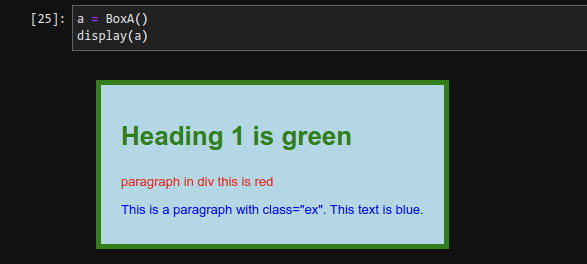

Note in the following markdown box, our h1 tags are now green.

<h1> I am an h1 and I am now green! </h1>

This affects all h1 tags in all the notebook, not just the ones after the styling is added for h1.

The following example differs from above because the box has two children.  The first one defines the style class, while the second one uses it.  This works.

In [4]:
class BoxB(W.Box):
  def __init__(self ,*args):
    super().__init__(*args)
    self.style = W.HTML('''
    <style>
      div.box_class_22 {
        background-color: lightgreen;
        color:red;
        border: 5px solid blue;
        margin: 20px;
        padding: 20px;
      }
      
      h1 {
        color: green;
      }

      p.ex {
        color: blue;
      }
    </style>
    ''')
    
    self.contents = W.HTML('''
        <div class=box_class_22>
           <h1>Heading 1 is green</h1> 
           <p>paragraph in div this is red</p>
           <p class="ex">This is a paragraph with class="ex". This text is blue.</p>  
        </div>
    ''')
    self.children = [self.style ,self.contents]

In [5]:
b = BoxB()
display(b)

BoxB(children=(HTML(value='\n    <style>\n      div.box_class_22 {\n        background-color: lightgreen;\n   …

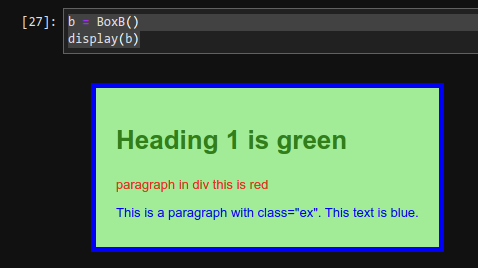

This example uses the style classes defined in the prior two examples.  They are stil available.  So apparntly we may have a dedicated widget with the sole purpose of defining classes, and then later other widgets may use them.

In [6]:
class BoxC(W.Box):
  def __init__(self ,*args):
    super().__init__(*args)
    
    self.contents1 = W.HTML('''
        <div class=box_class_21>
           <h1>Heading 1 is green</h1> 
           <p>paragraph in div this is red</p>
           <p class="ex">This is a paragraph with class="ex". This text is blue.</p>  
        </div>
    ''')
    self.contents2 = W.HTML('''
        <div class=box_class_22>
           <h1>Heading 1 is green</h1> 
           <p>paragraph in div this is red</p>
           <p class="ex">This is a paragraph with class="ex". This text is blue.</p>  
        </div>
    ''')
    self.children = [self.contents1 ,self.contents2]

In [7]:
c = BoxC()
display(c)

BoxC(children=(HTML(value='\n        <div class=box_class_21>\n           <h1>Heading 1 is green</h1> \n      …

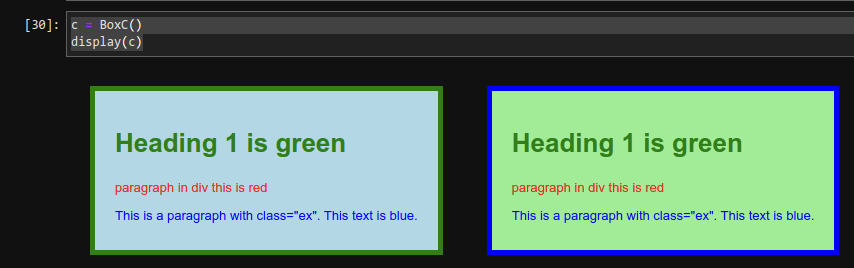

Here we use three separate children, where the first opens a div, the second provides the contents for the div, and the third closes the div.  This does not work.

In [8]:
class BoxD(W.Box):
  def __init__(self ,*args):
    super().__init__(*args)
    
    self.div_open = W.HTML("<div class=box_class_21")
    self.div_contents =  W.HTML('''
           <h1>Heading 1 is green</h1> 
           <p>paragraph in div this is red</p>
           <p class="ex">This is a paragraph with class="ex". This text is blue.</p>  
    ''')
    self.div_close = W.HTML("</div>")
    self.children = [self.div_open ,self.div_contents ,self.div_close]

In [9]:
d = BoxD()
display(d)

BoxD(children=(HTML(value='<div class=box_class_21'), HTML(value='\n           <h1>Heading 1 is green</h1> \n …

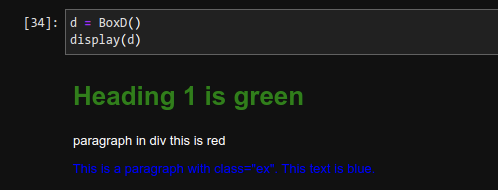